## Problem Statement

##### "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings .filterwarnings('ignore')
%matplotlib inline

In [69]:
df = pd.read_csv('Travel.csv')

In [70]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [72]:
df.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [73]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [74]:
# unnessesary category combined with the real meaning 
df['Gender']= df['Gender'].replace('Fe Male','Female')

In [75]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [76]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [77]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [78]:
# combining unessesary unmarried by single
df['MaritalStatus']= df['MaritalStatus'].replace('Unmarried','Single')

In [79]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [80]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [81]:
df['NumberOfTrips'].value_counts()

NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

In [82]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [83]:
df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [84]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [85]:
df['Passport'].value_counts()

Passport
0    3466
1    1422
Name: count, dtype: int64

In [86]:
df['OwnCar'].value_counts()

OwnCar
1    3032
0    1856
Name: count, dtype: int64

In [87]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [88]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [89]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### checking for missing values

In [90]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [91]:
feature_with_nan

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

##### let's calculate how much percent of missing values are there

In [92]:
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [93]:
df[feature_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### replacing nan value with

median for age\n
mode for type of contact\n
median for duraction of pitch
mode for nooffollowups
median for number of tips
 mode for preffered property star
 mode for no of children visiting
median for monthly income

In [94]:
df.Age.fillna(df.Age.median(),inplace=True)

#tpe of contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#duration of pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [95]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [96]:
df.drop(columns=['CustomerID'],inplace=True)

In [97]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [98]:
df['Total visiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True)

In [99]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [100]:
#number of numeric and non numeric feature
num_feature = [feature for feature in df.columns if df[feature].dtype!='O']
obj_feature = [feature for feature in df.columns if df[feature].dtype=='O']
print('numeric feature are' ,len(num_feature))
print('object feature are', len(obj_feature))

numeric feature are 12
object feature are 6


In [101]:
# discrete features
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=25]


In [102]:
# contineous festures
conti_feature = [feature for feature in num_feature if len(df[feature].unique())>25]


In [103]:
print(len(discrete_feature))
print(len(conti_feature))

9
3


In [104]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [105]:
x = df.drop(columns=['ProdTaken'])

In [106]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [107]:
y = df['ProdTaken']

In [108]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [110]:
cat_feature = x.select_dtypes(include='object').columns
num_features1 = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

from sklearn.compose import ColumnTransformer

transformer  = ColumnTransformer(
    [
        ("OneHotEncoder",encoder,cat_feature),
        ("StandardScaler",scaler,num_features1)
    ]
)

In [111]:
transformer

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total visiting'],
      dtype='object'))])

In [112]:
#transform training data
x_train=transformer.fit_transform(x_train)
#transforming test data
x_test = transformer.transform(x_test)

In [113]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.832865,-0.706695,-0.267939,0.293587,-0.728571,-0.131279,1.555956,1.394055,-1.303054,-0.737716,-0.076148
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.153236,1.486143,-0.981262,0.293587,0.524542,-0.672368,-0.642692,0.661368,0.767428,-0.099383,0.626011
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.256625,-0.706695,1.039820,0.293587,-0.728571,-0.672368,1.555956,-0.071320,0.767428,2.018596,-1.480465
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.360015,-0.706695,-0.386826,1.283107,0.524542,0.409811,1.555956,1.394055,0.767428,1.037747,0.626011
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.619137,-0.706695,1.634255,0.293587,-0.728571,-0.131279,1.555956,1.394055,0.767428,0.224156,0.626011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.281170,-0.706695,-0.267939,-0.695932,1.777654,-0.672368,1.555956,-0.071320,0.767428,-0.727669,-1.480465
3417,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.925609,-0.706695,-0.743488,1.283107,-0.728571,-0.672368,-0.642692,0.661368,0.767428,2.198691,0.626011
3418,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.832865,-0.706695,-0.981262,1.283107,0.524542,-0.131279,-0.642692,0.661368,0.767428,-0.397805,-0.076148
3419,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.508798,-0.706695,-0.743488,1.283107,1.777654,1.491990,-0.642692,0.661368,-1.303054,-0.520597,0.626011


### trainning the model

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score,accuracy_score

In [115]:
models = {
    "Logistic Regression ":LogisticRegression(),
    "Support Vactor Classifier":SVC(),
    "Decision Tree Regressor":DecisionTreeClassifier(),
    "Random Forest classifier":RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [116]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print('Model is ', list(models.keys())[i])
    print('Model Performence for training set')
    print('f1_score:',f1_score(y_train,y_train_pred,average='weighted'))
    print('accuracy_score:',accuracy_score(y_train,y_train_pred))
    print('precision_score:',precision_score(y_train,y_train_pred))
    print('recall_score:',recall_score(y_train,y_train_pred))
    print('roc_auc_score:',roc_auc_score(y_train,y_train_pred))
    print('--------------------------------------------------------------')

    print('Model Performence for test set')
    print('f1_score:',f1_score(y_test,y_test_pred,average='weighted'))
    print('accuracy_score:',accuracy_score(y_test,y_test_pred))
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('recall_score:',recall_score(y_test,y_test_pred))
    print('roc_auc_score:',roc_auc_score(y_test,y_test_pred))
    print('='*35)
    print('\n')



Model is  Logistic Regression 
Model Performence for training set
f1_score: 0.82314021434893
accuracy_score: 0.8491669102601579
precision_score: 0.7238805970149254
recall_score: 0.3050314465408805
roc_auc_score: 0.6392302654607455
--------------------------------------------------------------
Model Performence for test set
f1_score: 0.809115057559663
accuracy_score: 0.8391274710293115
precision_score: 0.7181818181818181
recall_score: 0.27816901408450706
roc_auc_score: 0.625982224709202


Model is  Support Vactor Classifier
Model Performence for training set
f1_score: 0.8751471446312135
accuracy_score: 0.8897983045893014
precision_score: 0.8936170212765957
recall_score: 0.46226415094339623
roc_auc_score: 0.7248484129941398
--------------------------------------------------------------
Model Performence for test set
f1_score: 0.8455557642158525
accuracy_score: 0.869120654396728
precision_score: 0.9035087719298246
recall_score: 0.3626760563380282
roc_auc_score: 0.6766888312121249


Model 

## HYPERPARAMETER TUNNING

In [117]:
param = {
   'criterion':['gini', 'entropy', 'log_loss'],
   'max_depth':[1,2,3,4,5,8,15,None,10],
   'max_features':['auto','sqrt','log2'],
   'n_estimators':[100,200,500]
}
AdaBoostClassifier()
ada_param = {
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME', 'SAMME.R'],
    
}

In [118]:
randomcv_model = [
    ("decidion Tree",RandomForestClassifier(),param),
    ("adaboost Tree",AdaBoostClassifier(),ada_param),

]

In [119]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name , model ,param in randomcv_model:
    random = RandomizedSearchCV(estimator=model,param_distributions=param,cv=3,verbose=3,n_jobs=-1)
    random.fit(x_train,y_train)
    model_params[name]=random.best_params_
for model_name in model_params:
    print(f'---------------Best Params for {model_name}-------------------')
    print(model_params[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------Best Params for decidion Tree-------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
---------------Best Params for adaboost Tree-------------------
{'n_estimators': 50, 'algorithm': 'SAMME'}


In [120]:
tunned_models={
    "randomForsest":RandomForestClassifier(n_estimators=500, max_features= 'sqrt', max_depth= None, criterion= 'gini'),
    "AdaBoostClassifier":AdaBoostClassifier(n_estimators=90,algorithm='SAMME')
}

In [122]:
for i in range(len(list(tunned_models))):
    tunned_model = list(tunned_models.values())[i]
    tunned_model.fit(x_train,y_train)

    y_train_pred = tunned_model.predict(x_train)
    y_test_pred = tunned_model.predict(x_test)

    print('Model is ', list(tunned_models.keys())[i])
    print('Model Performence for training set')
    print('f1_score:',f1_score(y_train,y_train_pred,average='weighted'))
    print('accuracy_score:',accuracy_score(y_train,y_train_pred))
    print('precision_score:',precision_score(y_train,y_train_pred))
    print('recall_score:',recall_score(y_train,y_train_pred))
    print('roc_auc_score:',roc_auc_score(y_train,y_train_pred))
    print('--------------------------------------------------------------')

    print('Model Performence for test set')
    print('f1_score:',f1_score(y_test,y_test_pred,average='weighted'))
    print('accuracy_score:',accuracy_score(y_test,y_test_pred))
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('recall_score:',recall_score(y_test,y_test_pred))
    print('roc_auc_score:',roc_auc_score(y_test,y_test_pred))
    print('='*35)
    print('\n')



Model is  randomForsest
Model Performence for training set
f1_score: 1.0
accuracy_score: 1.0
precision_score: 1.0
recall_score: 1.0
roc_auc_score: 1.0
--------------------------------------------------------------
Model Performence for test set
f1_score: 0.9132957996495524
accuracy_score: 0.9195637355146558
precision_score: 0.9322916666666666
recall_score: 0.6302816901408451
roc_auc_score: 0.809646339575917


Model is  AdaBoostClassifier
Model Performence for training set
f1_score: 0.8201111041837438
accuracy_score: 0.8509207833966677
precision_score: 0.7837837837837838
recall_score: 0.27358490566037735
roc_auc_score: 0.6281748585752515
--------------------------------------------------------------
Model Performence for test set
f1_score: 0.8074115607607489
accuracy_score: 0.841854124062713
precision_score: 0.782608695652174
recall_score: 0.2535211267605634
roc_auc_score: 0.6183074780041194




In [123]:
from sklearn.metrics import roc_curve

In [124]:
dummy_model_pred = [0 for _ in range(len(y_test))]

In [125]:
dummy_fpr,dummy_tpr ,_= roc_curve(y_test,dummy_model_pred)
model_fpr,model_tpr ,theresold= roc_curve(y_test,y_test_pred)

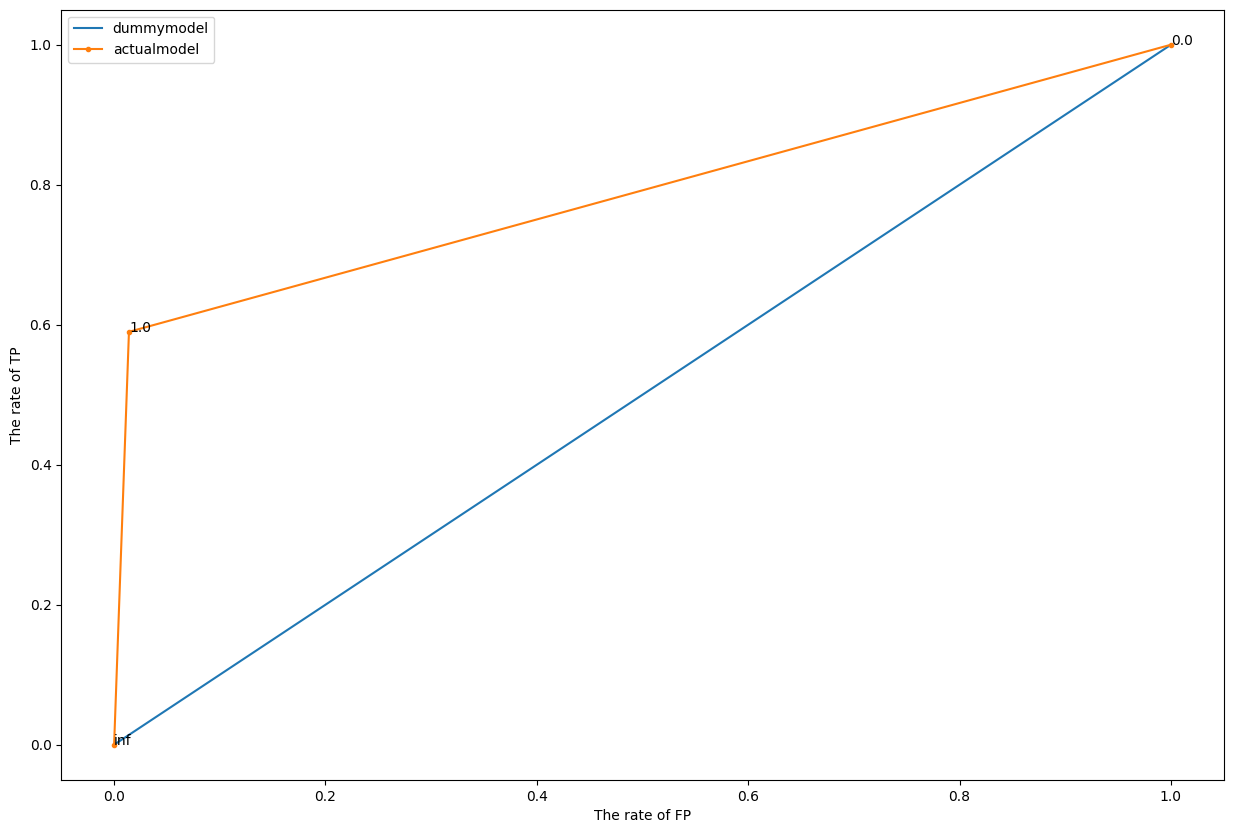

In [96]:
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111)

auc_models={
    'label':'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500, max_features= 'sqrt', max_depth= None, criterion= 'gini'),
    'auc':0.809646339575917

}

for algo in auc_models:
    model = algo['model']
    model.fit(x_train,y_train)
    model_fpr,model_tpr ,theresold= roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(model_fpr,model_tpr,label = '%s ROC (area = %0.2f)')